In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
df=pd.read_csv('Book2.csv')
df.head()

,ID,Age,Salary,Gender,Purchased,Country,Spending_Score,Product_Rating,Join_Date,Coupon_Used
0,101,58.0,NaN,Male,Yes,UK,82.0,NaN,2021-06-28,Yes
1,102,48.0,80000.0,Female,Yes,Canada,52.0,4.5,2021-09-02,No
2,103,34.0,60000.0,Female,Yes,USA,45.0,NaN,2018-05-11,No
3,104,100.0,70000.0,Female,Yes,Germany,86.0,4.5,2018-02-15,No
4,105,40.0,NaN,Male,Yes,Germany,68.0,NaN,2018-11-02,No


In [157]:
num_imputer=SimpleImputer(strategy='mean')
#Salary=df.select_dtypes(include=['int64','float64']).columns
df[['Salary']]=num_imputer.fit_transform(df[['Salary']])

In [159]:
df.head()

,ID,Age,Salary,Gender,Country,Spending_Score,Product_Rating,Join_Date,Coupon_Used_Yes,Purchased_Yes_1.0
0,101,58.0,64216.86747,Male,UK,0.957791,3.306667,2021-06-28,1.0,1.0
1,102,48.0,80000.00000,Female,Canada,-0.586530,4.500000,2021-09-02,0.0,1.0
2,103,34.0,60000.00000,Female,USA,-0.946871,3.306667,2018-05-11,0.0,1.0
3,104,100.0,70000.00000,Female,Germany,1.163700,4.500000,2018-02-15,0.0,1.0
4,105,40.0,64216.86747,Male,Germany,0.237108,3.306667,2018-11-02,0.0,1.0


In [71]:
mean_age = df.loc[df['Age'] >= 0, 'Age'].mean()
df['Age'] = df['Age'].apply(lambda x: x if x >= 0 else None)
imputer = SimpleImputer(strategy='mean')
df[['Age']] = imputer.fit_transform(df[['Age']])


In [124]:
df.head()

,ID,Age,Salary,Gender,Purchased,Country,Spending_Score,Product_Rating,Join_Date,Coupon_Used
0,101,58.0,64216.86747,Male,Yes,UK,82.0,NaN,2021-06-28,Yes
1,102,48.0,80000.00000,Female,Yes,Canada,52.0,4.5,2021-09-02,No
2,103,34.0,60000.00000,Female,Yes,USA,45.0,NaN,2018-05-11,No
3,104,100.0,70000.00000,Female,Yes,Germany,86.0,4.5,2018-02-15,No
4,105,40.0,64216.86747,Male,Yes,Germany,68.0,NaN,2018-11-02,No


In [126]:
#one hot encoding of the categorical variables 
encoder = OneHotEncoder(sparse_output=False, drop='first')

categorical_data = pd.DataFrame(
    encoder.fit_transform(df[['Coupon_Used']]),  
    columns=encoder.get_feature_names_out(['Coupon_Used'])  
)

df = pd.concat([df.drop(columns=['Coupon_Used']), categorical_data], axis=1)


In [128]:
df.head()

,ID,Age,Salary,Gender,Purchased,Country,Spending_Score,Product_Rating,Join_Date,Coupon_Used_Yes
0,101,58.0,64216.86747,Male,Yes,UK,82.0,NaN,2021-06-28,1.0
1,102,48.0,80000.00000,Female,Yes,Canada,52.0,4.5,2021-09-02,0.0
2,103,34.0,60000.00000,Female,Yes,USA,45.0,NaN,2018-05-11,0.0
3,104,100.0,70000.00000,Female,Yes,Germany,86.0,4.5,2018-02-15,0.0
4,105,40.0,64216.86747,Male,Yes,Germany,68.0,NaN,2018-11-02,0.0


In [149]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_data = pd.DataFrame(
    encoder.fit_transform(df[['Purchased_Yes']]),  
    columns=encoder.get_feature_names_out(['Purchased_Yes'])  
)
df = pd.concat([df.drop(columns=['Purchased_Yes']), categorical_data], axis=1)

In [151]:
df.head(10)

,ID,Age,Salary,Gender,Country,Spending_Score,Product_Rating,Join_Date,Coupon_Used_Yes,Purchased_Yes_1.0
0,101,58.0,64216.86747,Male,UK,0.957791,3.306667,2021-06-28,1.0,1.0
1,102,48.0,80000.00000,Female,Canada,-0.586530,4.500000,2021-09-02,0.0,1.0
2,103,34.0,60000.00000,Female,USA,-0.946871,3.306667,2018-05-11,0.0,1.0
3,104,100.0,70000.00000,Female,Germany,1.163700,4.500000,2018-02-15,0.0,1.0
4,105,40.0,64216.86747,Male,Germany,0.237108,3.306667,2018-11-02,0.0,1.0
5,106,-5.0,60000.00000,Female,India,0.957791,3.306667,2016-09-12,0.0,1.0
6,107,38.0,60000.00000,Female,Canada,0.391540,4.000000,2019-06-14,1.0,1.0
7,108,42.0,40000.00000,Male,USA,1.215178,3.306667,2021-03-05,1.0,0.0
8,109,30.0,60000.00000,Male,India,0.237108,3.500000,2015-08-14,1.0,0.0
9,110,30.0,80000.00000,Male,UK,-1.049826,4.000000,2021-05-21,1.0,1.0


In [153]:
mean_age = df.loc[df['Product_Rating'] >= 0, 'Product_Rating'].mean()
df['Product_Rating'] = df['Product_Rating'].apply(lambda x: x if x >= 0 else None)
imputer = SimpleImputer(strategy='mean')
df[['Product_Rating']] = imputer.fit_transform(df[['Product_Rating']])

In [155]:
df.head()

,ID,Age,Salary,Gender,Country,Spending_Score,Product_Rating,Join_Date,Coupon_Used_Yes,Purchased_Yes_1.0
0,101,58.0,64216.86747,Male,UK,0.957791,3.306667,2021-06-28,1.0,1.0
1,102,48.0,80000.00000,Female,Canada,-0.586530,4.500000,2021-09-02,0.0,1.0
2,103,34.0,60000.00000,Female,USA,-0.946871,3.306667,2018-05-11,0.0,1.0
3,104,100.0,70000.00000,Female,Germany,1.163700,4.500000,2018-02-15,0.0,1.0
4,105,40.0,64216.86747,Male,Germany,0.237108,3.306667,2018-11-02,0.0,1.0


Text(0.5, 1.0, 'Distribution of age and salary')

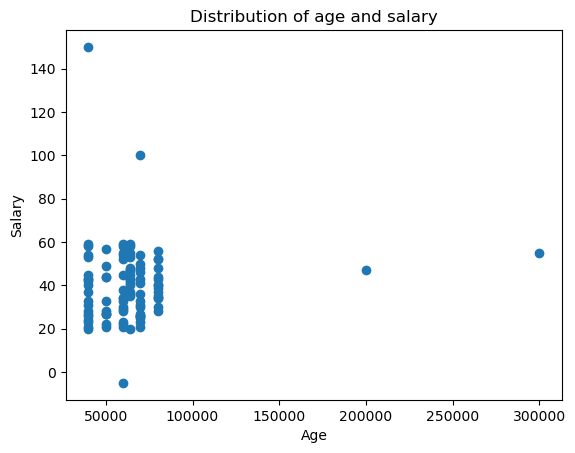

In [167]:
#Let us consider age as the feature variable and Salary as the target variable
import matplotlib.pyplot as plt
X=df['Salary']
y=df['Age']
plt.scatter(X,y)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Distribution of age and salary')

In [171]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80,), (20,), (80,), (20,))

In [ ]:
#The dataset is now divided into test and train data so as to build a model and use it for prediction purposes.